변수,설명
- ID,고객 대출 신청 ID
- Client_Income,고객 소득
- Car_Owned,다른 차량에 대한 대출을 신청하기 전에 고객이 소유한 모든 차량(0은 아니요, 1은 그렇지 않음을 의미)
- Bike_Owned,고객이 소유한 모든 자전거(0은 아니요, 1은 그렇지 않음을 의미)
- Active_Loan,대출 신청 당시 진행 중인 다른 대출이 있는지 여부(0은 아니요, 1은 그렇지 않음을 의미)
- House_Own,고객이 소유한 주택 수(0은 아니요, 1은 그 외의 주택)
- Child_Count,고객이 보유한 자녀 수
- Credit_Amount,대출의 신용 금액($)
- Loan_Annuity,대출 연금($)
- Accompany_Client,고객이 대출을 신청할 때 고객과 동행한 사람
- Client_Income_Type,고객 소득 유형
- Client_Education,고객이 달성한 최고 교육 수준
- Client_Marital_Status,"고객의 결혼 상태(D- 이혼, S- 미혼, M- 기혼, W- 사별)"
- Client_Gender,고객의 성별
- Loan_Contract_Type,"대출 유형(CL- 현금대출, RL- 리볼빙대출)"
- Client_Housing_Type,고객 주택 상황
- Population_Region_Relative,고객이 거주하고 있는 지역의 상대적 인구수. 값이 높을수록 고객이 인구가 많은 지역에 거주하고 있음을 의미합니다.
- Age_Days,신청서 제출 시점의 고객 나이
- Employed_Days, 고용된_일수,"신청 전, 고객이 수입을 시작한 일수"
- Registration_Days,"대출 신청일 전, 고객이 등록을 변경한 일수"
- ID_Days,"대출 신청 며칠 전, 고객이 대출을 신청한 신분증을 변경했습니다."
- Own_House_Age,고객 소유 주택의 나이(년)
- Mobile_Tag,고객이 제공한 휴대폰 번호(1은 예, 0은 아니오를 의미)
- Homephone_Tag,고객이 제공한 집전화 번호(1은 예, 0은 아니오를 의미)
- Workphone_Working,직장 전화 번호로 연락 가능했는지(1은 예, 0은 아니오)
- Client_Occupation,고객 직업 유형
- Client_Family_Members,고객이 보유한 가족 구성원 수
- Cleint_City_Rating,고객 도시 등급. 3은 최고, 2는 좋음, 1은 평균을 나타냅니다.
- Application_Process_Day,고객이 대출을 신청한 요일(0-일,1-월,2-화,3-수,4-목,5-금,6-토)"
- Application_Process_Hour,고객이 대출을 신청한 요일 시간
- Client_Permanent_Match_Tag,고객 연락처 주소가 영구 주소와 일치하지 않는 경우 표시.
- Client_Contact_Work_Tag,고객 직장 주소가 연락처 주소와 일치하지 않는 경우 표시.
- Type_Organization,클라이언트가 근무하는 조직 유형
- Score_Source_1,다른 출처에서 얻은 점수. 정규화된 점수입니다.
- Score_Source_2,다른 출처에서 얻은 점수입니다. 정규화된 점수입니다.
- Score_Source_3,다른 소스에서 가져온 점수입니다. 정규화된 점수입니다.
- Social_Circle_Default,지난 60일 동안 대출 상환을 불이행한 고객의 친구/가족 수
- Phone_Change,"대출 신청 며칠 전에 고객이 휴대폰을 변경했는지"
- Credit_Bureau,작년 총 조회 건수
- Default,1은 고객이 대출 상환을 불이행했음을 의미하고 0은 그렇지 않음을 의미합니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')
test_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Test_Dataset.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_11472\2331850082.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_11472\2331850082.py:2: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Test_Dataset.csv')


In [3]:
train_df.head(10)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
5,12191614,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,...,Yes,Yes,Other,NaN,0.697928,0.420611,0.0639,739.0,0.0,0
6,12128086,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,...,Yes,Yes,XNA,0.729913,0.602545,0.511892,0.2041,0.0,3.0,0
7,12215264,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,...,Yes,Yes,XNA,0.711468,0.657508,0.549597,NaN,1687.0,4.0,0
8,12159147,13500,1.0,1.0,0.0,1.0,1.0,45000,1200.15,Relative,...,Yes,Yes,Self-employed,0.475727,0.637594,0.553165,0.1670,1611.0,0.0,0
9,12130547,12150,0.0,0.0,0.0,1.0,0.0,16320.15,1294.65,Alone,...,Yes,Yes,XNA,0.682285,0.063343,0.08065,NaN,533.0,5.0,0


In [4]:
train_df.Age_Days

0           13957
1           14162
2           16790
3           23195
4           11366
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: object

In [5]:
print(train_df.shape) 
print(test_df.shape)
# train:test = 6:4 

(121856, 40)
(80900, 39)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

In [8]:
# 결측치 확인
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [9]:
test_df.isna().sum()

ID                                0
Client_Income                  2434
Car_Owned                      2405
Bike_Owned                     2486
Active_Loan                    2454
House_Own                      2347
Child_Count                    2328
Credit_Amount                  2287
Loan_Annuity                   3203
Accompany_Client               1208
Client_Income_Type             2501
Client_Education               2350
Client_Marital_Status          2443
Client_Gender                  1627
Loan_Contract_Type             2321
Client_Housing_Type            2408
Population_Region_Relative     3270
Age_Days                       2479
Employed_Days                  2421
Registration_Days              2398
ID_Days                        3881
Own_House_Age                 53581
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             27845
Client_Family_Members          1644
Cleint_City_Rating          

In [10]:
# 컬럼 오타 변경 
train_df.rename(columns = {'Cleint_City_Rating':'Client_City_Rating'}, inplace=True)
test_df.rename(columns = {'Cleint_City_Rating':'Client_City_Rating'}, inplace=True)

In [11]:
train_df.Client_Income = train_df.Client_Income.replace('$', '')

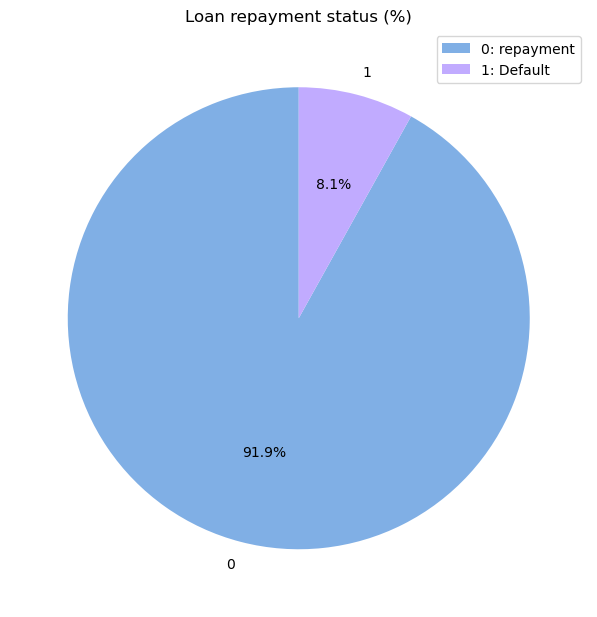

In [32]:
# target y = Default 
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['0: repayment', '1: Default']
colors = ['#80afe5', '#c1abff']
default = train_df.Default.value_counts()
plt.figure(figsize=(7.5, 7.5))
plt.pie(default, labels=default.index, autopct='%1.1f%%',startangle=90, 
        colors = colors)
plt.legend(labels)
plt.title('Loan repayment status (%)')
plt.show()

In [35]:
train_df.Client_Income

0          6750
1         20250
2         18000
3         15750
4         33750
          ...  
121851    29250
121852    15750
121853     8100
121854    38250
121855     9000
Name: Client_Income, Length: 121856, dtype: object

In [21]:
car = train_df.Car_Owned.value_counts(dropna=False)
bike = train_df.Bike_Owned.value_counts(dropna=False)
house = train_df.House_Own.value_counts(dropna=False)

vehicles = [car, bike, house]
titles = ['Car', 'Bike', 'House']
car, bike, house

(0.0    77724
 1.0    40551
 NaN     3581
 Name: Car_Owned, dtype: int64,
 0.0    78948
 1.0    39284
 NaN     3624
 Name: Bike_Owned, dtype: int64,
 1.0    81798
 0.0    36397
 NaN     3661
 Name: House_Own, dtype: int64)

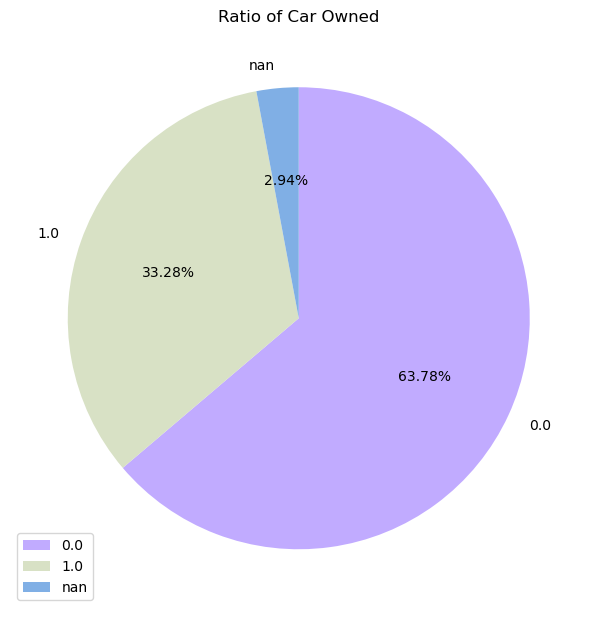

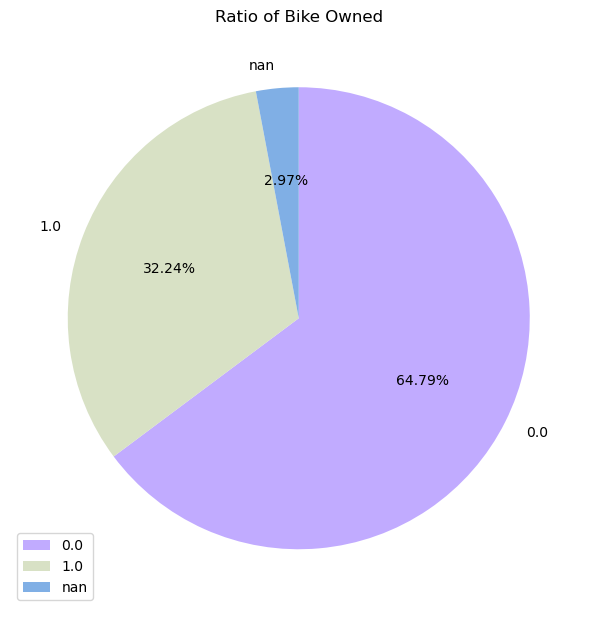

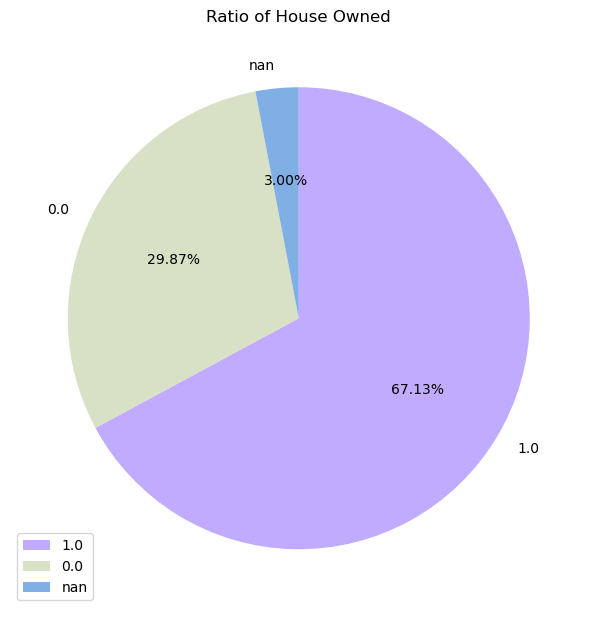

In [22]:
colors = ['#c1abff', '#d8e1c5', '#80afe5']
for vehicle, title in zip(vehicles, titles):
    plt.figure(figsize=(7.5, 7.5))
    plt.pie(vehicle, labels=vehicle.index, autopct='%.2f%%', startangle=90, counterclock=False,
           colors = colors)
    plt.legend()
    plt.title(f'Ratio of {title} Owned')
    plt.show()

In [35]:
pay_df = train_df.copy()
pay_df['Client_Income'] = pd.to_numeric(train_df['Client_Income'], errors='coerce')
pay_df['Credit_Amount'] = pd.to_numeric(train_df['Credit_Amount'], errors='coerce')
pay_df['Loan_Annuity'] = pd.to_numeric(train_df['Loan_Annuity'], errors='coerce')

In [67]:
pay_df.Client_Income

0          6750.0
1         20250.0
2         18000.0
3         15750.0
4         33750.0
           ...   
121851    29250.0
121852    15750.0
121853     8100.0
121854    38250.0
121855     9000.0
Name: Client_Income, Length: 121856, dtype: float64

In [69]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

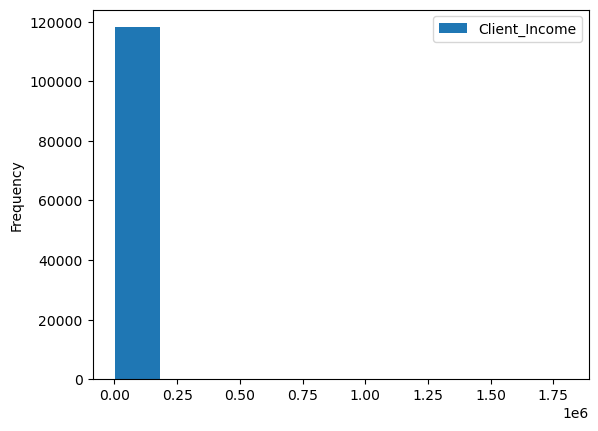

In [74]:
pay_df.plot(kind="hist", y="Client_Income")
plt.show()

In [62]:
def draw_facetgrid(feature):
    facet = sns.FacetGrid(pay_df, hue="Default", aspect=3) # Multi-plot grid for plotting conditional relationships.
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, pay_df[feature].max()))
    
    
    facet.add_legend() 
    plt.show()

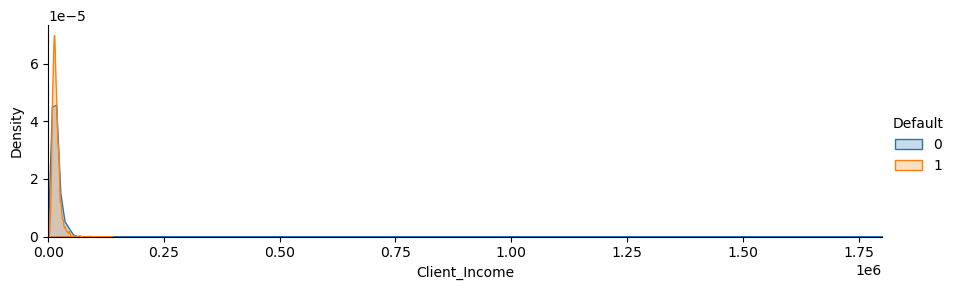

In [63]:
draw_facetgrid("Client_Income")

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: 'value' must be an instance of str or bytes, not a float

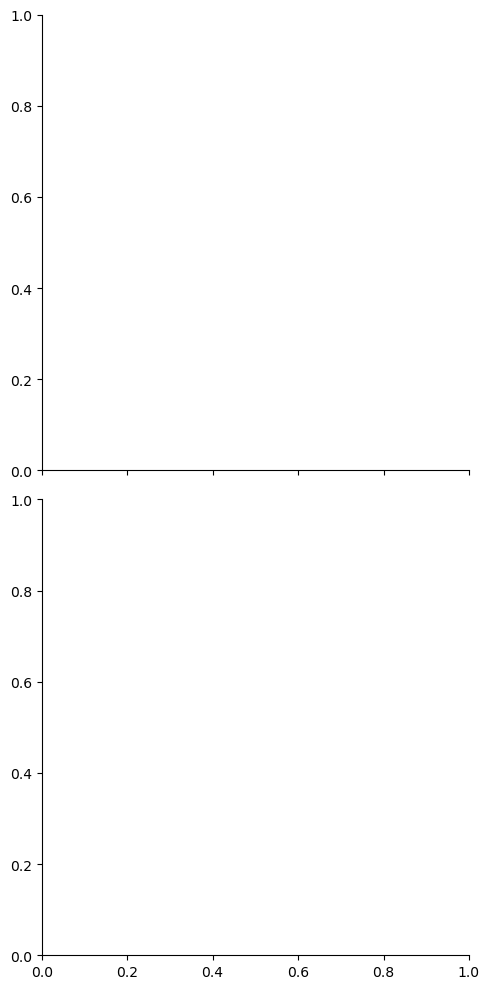

In [55]:
facet = sns.FacetGrid(pay_df, row='Default', size=5)
facet = facet.map(sns.regplot, 'Client_Income', 'Age_Days', fit_reg=False)

<AxesSubplot:xlabel='Default', ylabel='Client_Income'>

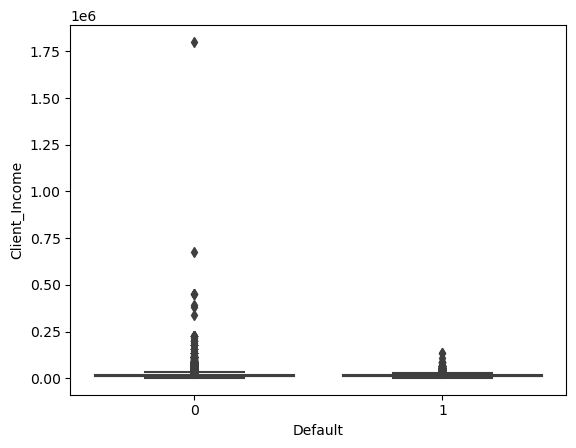

In [75]:
sns.boxplot(y='Client_Income', x='Default', data=pay_df)

In [77]:
pay_df.groupby(['Default'])['Client_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,108670.0,16938.840039,11776.759240,2565.0,11250.0,14850.0,20250.0,1800009.0
1,9564.0,16028.370216,8316.569573,2790.0,11250.0,13500.0,19350.0,135000.0


In [79]:
columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
for column in columns:
    pay_df[column] = pd.to_numeric(train_df[column], errors='coerce')

In [81]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

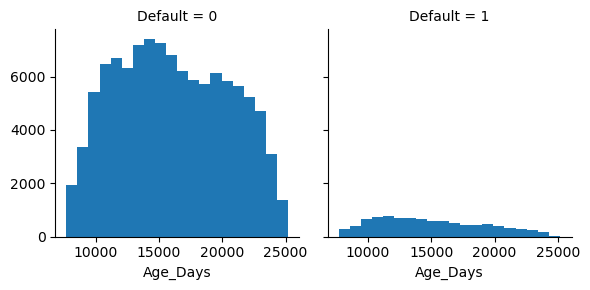

In [83]:
age_histo = sns.FacetGrid(pay_df, col='Default')
age_histo.map(plt.hist, 'Age_Days', bins=20)
plt.show()

In [84]:
pay_df.Age_Days

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: float64

In [92]:
pay_df.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,1.182340e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118219.000000,117030.000000,116988.000000,...,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,94934.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,1.686519e+04,0.342854,0.332262,0.499175,0.692060,0.417779,60046.488951,2721.254492,0.022602,...,2.030038,3.159736,12.063100,0.501213,0.518625,0.511180,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,...,0.504407,1.759045,3.280695,0.211204,0.740248,0.194333,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,...,1.000000,0.000000,0.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010006,...,2.000000,2.000000,10.000000,0.333481,0.390164,0.372334,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51750.000000,2499.750000,0.018850,...,2.000000,3.000000,12.000000,0.504657,0.564978,0.537070,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3466.800000,0.028663,...,2.000000,5.000000,14.000000,0.673890,0.664011,0.667458,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,...,3.000000,6.000000,23.000000,0.945741,100.000000,0.896010,1.000000,4185.000000,22.000000,1.000000


Car_Owned, Bike_Owned, Active_Loan, House_Own -> 범주형 데이터

In [93]:
pay_df.describe(include=['O'])

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
count,120110,118155,118211,118383,119443,118205,118169,80421,121856,121856,118247
unique,7,8,5,4,3,2,6,18,2,2,58
top,Alone,Service,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,Business Entity Type 3
freq,97409,61028,83911,87349,78463,107118,104870,21024,112454,100015,26279


In [97]:
pay_df['Client_Gender'].value_counts()

Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64

In [102]:
import time
time.gmtime(pay_df.Age_Days[0])

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=3, tm_min=52, tm_sec=37, tm_wday=3, tm_yday=1, tm_isdst=0)

In [100]:
pay_df.Age_Days

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: float64

In [95]:
pay_df.isna().sum()

ID                                0
Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [ ]:
# 결측치 대체  필요

In [ ]:
결측값을 변수별 평균으로 대체하기(filling missing values with mean per columns)
      : df.fillna(df.mean()), df.where(pd.notnull(df), df.mean(), axis='columns')

In [ ]:
num_colums=['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative,' 
           ' Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 
            'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default','Phone_Change','Credit_Bureau']

cag_colums=['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own']

In [103]:
pay_df.Age_Days

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: float64

In [104]:
import time
time.gmtime(pay_df.Age_Days[0])

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=3, tm_min=52, tm_sec=37, tm_wday=3, tm_yday=1, tm_isdst=0)

In [111]:
def read_file(loc):
    return pd.read_csv(
        loc,
        index_col='ID',
        na_values=['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&'],
        dtype={
            'Accompany_Client': 'category',
            'Client_Income_Type': 'category',
            'Client_Education': 'category',
            'Client_Marital_Status': 'category',
            'Client_Gender': 'category',
            'Loan_Contract_Type': 'category',
            'Client_Housing_Type': 'category',
            'Client_Occupation': 'category',
            'Type_Organization': 'category',
            'Default': 'bool',
        },
        true_values=['Yes'],
        false_values=['No'],
    ).rename(
        columns={
            'Cleint_City_Rating':'Client_City_Rating',
        }
    )

train_location = '/semi_project/nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv'
test_location = '/semi_project/nbfi_vehicle_loan_repayment_dataset/Test_Dataset.csv'

In [112]:
df = read_file(train_location)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121856 entries, 12142509 to 12105610
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Client_Income               118234 non-null  float64 
 1   Car_Owned                   118275 non-null  float64 
 2   Bike_Owned                  118232 non-null  float64 
 3   Active_Loan                 118221 non-null  float64 
 4   House_Own                   118195 non-null  float64 
 5   Child_Count                 118218 non-null  float64 
 6   Credit_Amount               118219 non-null  float64 
 7   Loan_Annuity                117030 non-null  float64 
 8   Accompany_Client            120098 non-null  category
 9   Client_Income_Type          118155 non-null  category
 10  Client_Education            118211 non-null  category
 11  Client_Marital_Status       118383 non-null  category
 12  Client_Gender               119440 non-null  cate

In [114]:
df.isna().sum()

Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1758
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2416
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [121]:
num_columns=['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 
            'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 
            'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default','Phone_Change','Credit_Bureau']

cag_colums=['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client',
            'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 
            'Loan_Contract_Type','Client_Housing_Type', 'Client_Occupation',' Client_Permanent_Match_Tag', 
            'Client_Contact_Work_Tag','Type_Organization']

In [134]:
num_columns=['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 
            'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 
            'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default','Phone_Change','Credit_Bureau']

for num_column in num_columns:
    pay_df[num_column].fillna(pay_df[num_column].mean(), inplace=True)

In [135]:
pay_df.isna().sum()

ID                                0
Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative        0
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [116]:
pay_df.Client_Income.mean()

16865.191737063782

In [64]:
data = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')
data_null_perecnet = (data.isnull().sum()/ len(data)) *100
data_null_perecnet

C:\Users\User\AppData\Local\Temp\ipykernel_11472\3666421057.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')


ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [68]:
data.Accompany_Client.value_counts()

Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64

In [70]:
data.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          